# 6.9 Entropy generation: steam in Piston-cyclinder

## Problem Statement:

$1\:kg$ of water is stored in a piston-cylinder system at its saturated liquid state at $T=100^{\circ} C$. The system is then heated resulting in the piston moving up till the piston hits the maximum-capacity point at $V=0.5\:m^3$ and stops moving. Heating is then continued untill water temperature reaches $T=200^{\circ} C$. Determine,

a) the final pressure of water

b) boundary work 

c) the heat required

d) total entropy change 

e) entropy generation given the heat comes from a source at $T=250^{\circ} C$

f) plot the process on a T-s diagram

![CH6-Q7.png](CH6-Q7.png)

### Solution Approach for a)

Lets number the initial state as (1), the point where the piston hits max capacity (2) and the final state as (3).

The volume (and specific volume) of water remains constant after reaching the maximum point, therefore

$D_3=D_2$

and

$T_3=200^{\circ} C$

In [1]:
# import the libraries we'll need
import CoolProp.CoolProp as CP
import numpy as np
import matplotlib.pyplot as plt

m = 1   #fluid mass in kg
V_2 = 0.5   #fluid volume at the state #2
V_3 = V_2   #fluid volume at the state #3
D_3 = m / V_3   #fluid density at state #3
T_3 = 200 + 273.15   #fluid temperature at state #3
fluid = "water"  # define the fluid or material of interest

P_3 = CP.PropsSI("P", "T", T_3, "D", D_3, fluid)   #fluid pressure at state #3
print('The pressure at state #3 is:', f"{P_3/1000:.1f}", 'kPa')

The pressure at state #3 is: 426.8 kPa


### Solution Approach for b)

boundary work from (2) to (3) is zero since the boundary is fixed. The process (1) to (2) is constant pressure, therefore

$W=P(\Delta V)$

In [2]:
T_1 = 100 + 273.15   #initial temperature in K
P_1 = CP.PropsSI("P", "T", T_1, "Q", 0, fluid)   #fluid pressure at state #1 in Pa
D_1 = CP.PropsSI("D", "T", T_1, "Q", 0, fluid)   #fluid density at state #1 in kg/m3
V_1 = m / D_1   #fluid volume at state #1 in m3
V_2 = 0.5   #fluid volume at state #2 in m3
W = P_1 * (V_2 - V_1)   #boundary work for 1-2 in J

print('The boundary work for the process is:', f"{W/1000:.1f}", 'kJ')

The boundary work for the process is: 50.6 kJ


### Solution Approach for c)

from the first law

$Q=\Delta U + W$

In [3]:
u_1 = CP.PropsSI("U", "T", T_1, "Q", 0, fluid)   #fluid internal energy at state #1 in J/kg
u_3 = CP.PropsSI("U", "T", T_3, "D", D_3, fluid)   #fluid internal energy at state #3 in J/kg
dU = m * (u_3 - u_1)   #change in internal energy in J
Q = dU + W   #heat required in J

print('The heat required for the process is:', f"{Q/1000:.1f}", 'kJ')

The heat required for the process is: 2277.7 kJ


### Solution Approach for d)

total entropy change would be

$\Delta S=m(s_3-s_1)$

In [4]:
s_1 = CP.PropsSI("S", "T", T_1, "Q", 0, fluid)   #fluid specific entropy at state #1 in J/kg.K
s_3 = CP.PropsSI("S", "T", T_3, "D", D_3, fluid)   #fluid specific entropy at state #3 in J/kg.K
dS = m * (s_3 - s_1)

print('The total entropy change for the process is:', f"{dS/1000:.1f}", 'kJ/kg.K')

The total entropy change for the process is: 5.8 kJ/kg.K


### Solution Approach for e)

$\Delta S=Q/T+S_{gen}$

so 

$S_{gen}=\Delta S-Q/T_s$

In [5]:
T_s = 250 + 273.15   #surrounding temperature in K
S_gen = dS - Q/T_s   #entropy generation in J/kg.K
print('The total entropy generation for the process is:', f"{S_gen/1000:.1f}", 'kJ/kg.K')

The total entropy generation for the process is: 1.5 kJ/kg.K


### Solution Approach for e)

The code at Q#5 of this chapter is used here

373.15

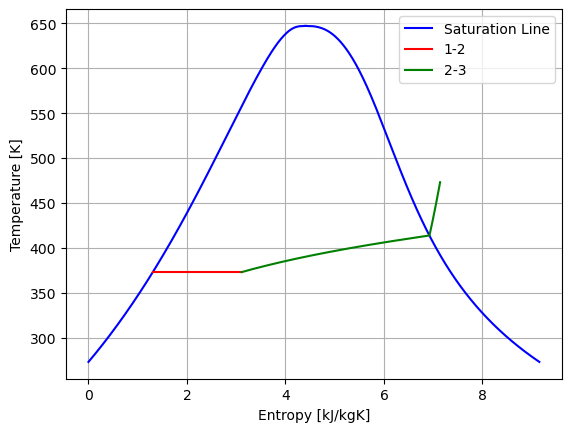

In [6]:
T_min = CP.PropsSI("Tmin", fluid)  # triple-point temp for the fluid in K
T_crit = CP.PropsSI("Tcrit", fluid)   #critical point temperature in K
T_vals = np.linspace(T_min, T_crit, 1000)  # define an array of values for temperature

Q = 1  # define the fluid quality as 1, which is 100% vapor

entropy = [CP.PropsSI("S", "T", T, "Q", Q, fluid)/1000 for T in T_vals]  # call for entropy values using CoolProp

plt.plot(entropy, T_vals, "-b", label="Saturation Line")  # plot pressure vs enthalpy

Q = 0  # define the fluid quality as 0, which is 100% liquid

entropy = [CP.PropsSI("S", "T", T, "Q", Q, fluid)/1000 for T in T_vals]  # call for entropy values using CoolProp

plt.plot(entropy, T_vals, "-b")  # plot pressure vs enthalpy

# process 1-2
P = P_1   #constant pressure in Pa
Q_1 = 0   #fluid quality at state #1

P_2 = P_1   #constant pressure for 1-2
T_2 = T_1   #constant temperature for 1-2 due to saturation
D_2 = D_3   #constant volume for 2-3
Q_2 = CP.PropsSI("Q", "P", P_2, "D", D_2, fluid)   #fluid quality at state #2

Q_vals = np.linspace(Q_1, Q_2, 1000)  # define an array of values for temperature

entropy = [CP.PropsSI("S", "P", P, "Q", Q, fluid)/1000 for Q in Q_vals]  # call for entropy values using CoolProp
T_vals = np.linspace(T_1, T_2, 1000)   #constant temperature and pressure due to saturation 1-2

plt.plot(entropy, T_vals, "-r", label="1-2")  # plot pressure vs enthalpy

#process 2-3
D = D_3   #density kg/m3

T_vals = np.linspace(T_2, T_3, 1000)    # define an array of values for temperature
entropy = [CP.PropsSI("S", "T", T, "D", D, fluid)/1000 for T in T_vals]  # call for entropy values using CoolProp

plt.plot(entropy, T_vals, "-g", label="2-3")  # plot pressure vs enthalpy

plt.ylabel("Temperature [K]")  # give y axis a label
plt.xlabel("Entropy [kJ/kgK]")  # give x axis a label
plt.grid()
plt.legend()
T_2